In [59]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image

In [60]:
df = pd.read_html('https://fbref.com/en/comps/10/keepersadv/Championship-Stats#all_stats_keeper_adv', attrs = {"id" : "results2023-2024101_overall"})[0]

In [61]:
df.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Leicester City,37,26,4,7,74,33,41,82,2.22,67.5,35.1,32.4,0.88,L L L W D,31053,Jamie Vardy - 13,Mads Hermansen,NaN
1,2,Leeds United,37,24,7,6,68,28,40,79,2.14,65.7,30.9,34.8,0.94,W W D W W,35895,Crysencio Summerville - 15,Illan Meslier,NaN
2,3,Ipswich Town,37,23,9,5,74,49,25,78,2.11,59.8,38.6,21.2,0.57,W W W W L,28797,Conor Chaplin - 12,Václav Hladký,NaN
3,4,Southampton,36,22,7,7,73,47,26,73,2.03,64.3,37.6,26.6,0.74,W L L W W,29333,Adam Armstrong - 18,Gavin Bazunu,NaN
4,5,West Brom,37,18,9,10,57,36,21,63,1.70,45.1,38.7,6.4,0.17,W D W D W,23884,Brandon Thomas-Asante - 9,Alex Palmer,NaN


In [62]:
df.rename(columns={'Rk': 'Pos'}, inplace=True)

In [63]:
df['badge'] = df['Squad'].apply(lambda x: f"C:/Users/George/Documents/Football Analytics/Team Logos/{x.lower()}_logo.png")

In [64]:
df['badge'][0]

'C:/Users/George/Documents/Football Analytics/Team Logos/leicester city_logo.png'

In [65]:
df.columns

Index(['Pos', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance', 'Top Team Scorer',
       'Goalkeeper', 'Notes', 'badge'],
      dtype='object')

In [66]:
df = df[[
    'Pos', 'badge','Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
    'xG', 'xGA', 'xGD'
]]

In [67]:
# Background colour
bg_colour = "#FFFFFF"
text_colour = "#000000"
row_colors = {
    "top2": "#E1FABC",
    "top6": "#FFFC97",
    "relegation": "#E79A9A",
    "even": "#E2E2E1",
    "odd": "#B3B0B0",
}
plt.rcParams["text.color"] = text_colour
plt.rcParams["font.family"] = "monospace"

In [68]:
df.columns

Index(['Pos', 'badge', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts',
       'Pts/MP', 'xG', 'xGA', 'xGD'],
      dtype='object')

In [69]:
col_defs = [
    ColumnDefinition(
        name="Pos",
        textprops={"ha" : "center"},
        width=0.2,
    ),
    ColumnDefinition(
        name="badge",
        textprops={"ha" : "center", "va" : "center", "color" : bg_colour},
        width=0.5,
        plot_fn=image,
    ),
    ColumnDefinition(
        name="Squad",
        textprops={"ha" : "left", "weight" : "bold"},
        width=1.75,
    ),
    ColumnDefinition(
        name="MP",
        group="Matches Played",
        textprops={"ha" : "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="W",
        group="Matches Played",
        textprops={"ha" : "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="D",
        group="Matches Played",
        textprops={"ha" : "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="L",
        group="Matches Played",
        textprops={"ha" : "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GF",
        group="Goals",
        textprops={"ha" : "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GA",
        group="Goals",
        textprops={"ha" : "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GD",
        group="Goals",
        textprops={"ha" : "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Pts",
        group="Points",
        textprops={"ha" : "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Pts/MP",
        group="Points",
        textprops={"ha" : "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="xG",
        group="Expected Goals",
        textprops={"ha" : "center", "color" : text_colour, "weight" : "bold", "bbox" : {"boxstyle" : "circle", "pad" : 0.35}},
        cmap=normed_cmap(df["xG"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
    ColumnDefinition(
        name="xGA",
        group="Expected Goals",
        textprops={"ha" : "center", "color" : text_colour, "weight" : "bold", "bbox" : {"boxstyle" : "circle", "pad" : 0.35}},
        cmap=normed_cmap(df["xGA"], cmap=matplotlib.cm.PiYG_r, num_stds=2)
    ),
    ColumnDefinition(
        name="xGD",
        group="Expected Goals",
        textprops={"ha" : "center", "color" : text_colour, "weight" : "bold", "bbox" : {"boxstyle" : "circle", "pad" : 0.35}},
        cmap=normed_cmap(df["xGD"], cmap=matplotlib.cm.PiYG, num_stds=2)
    )
]

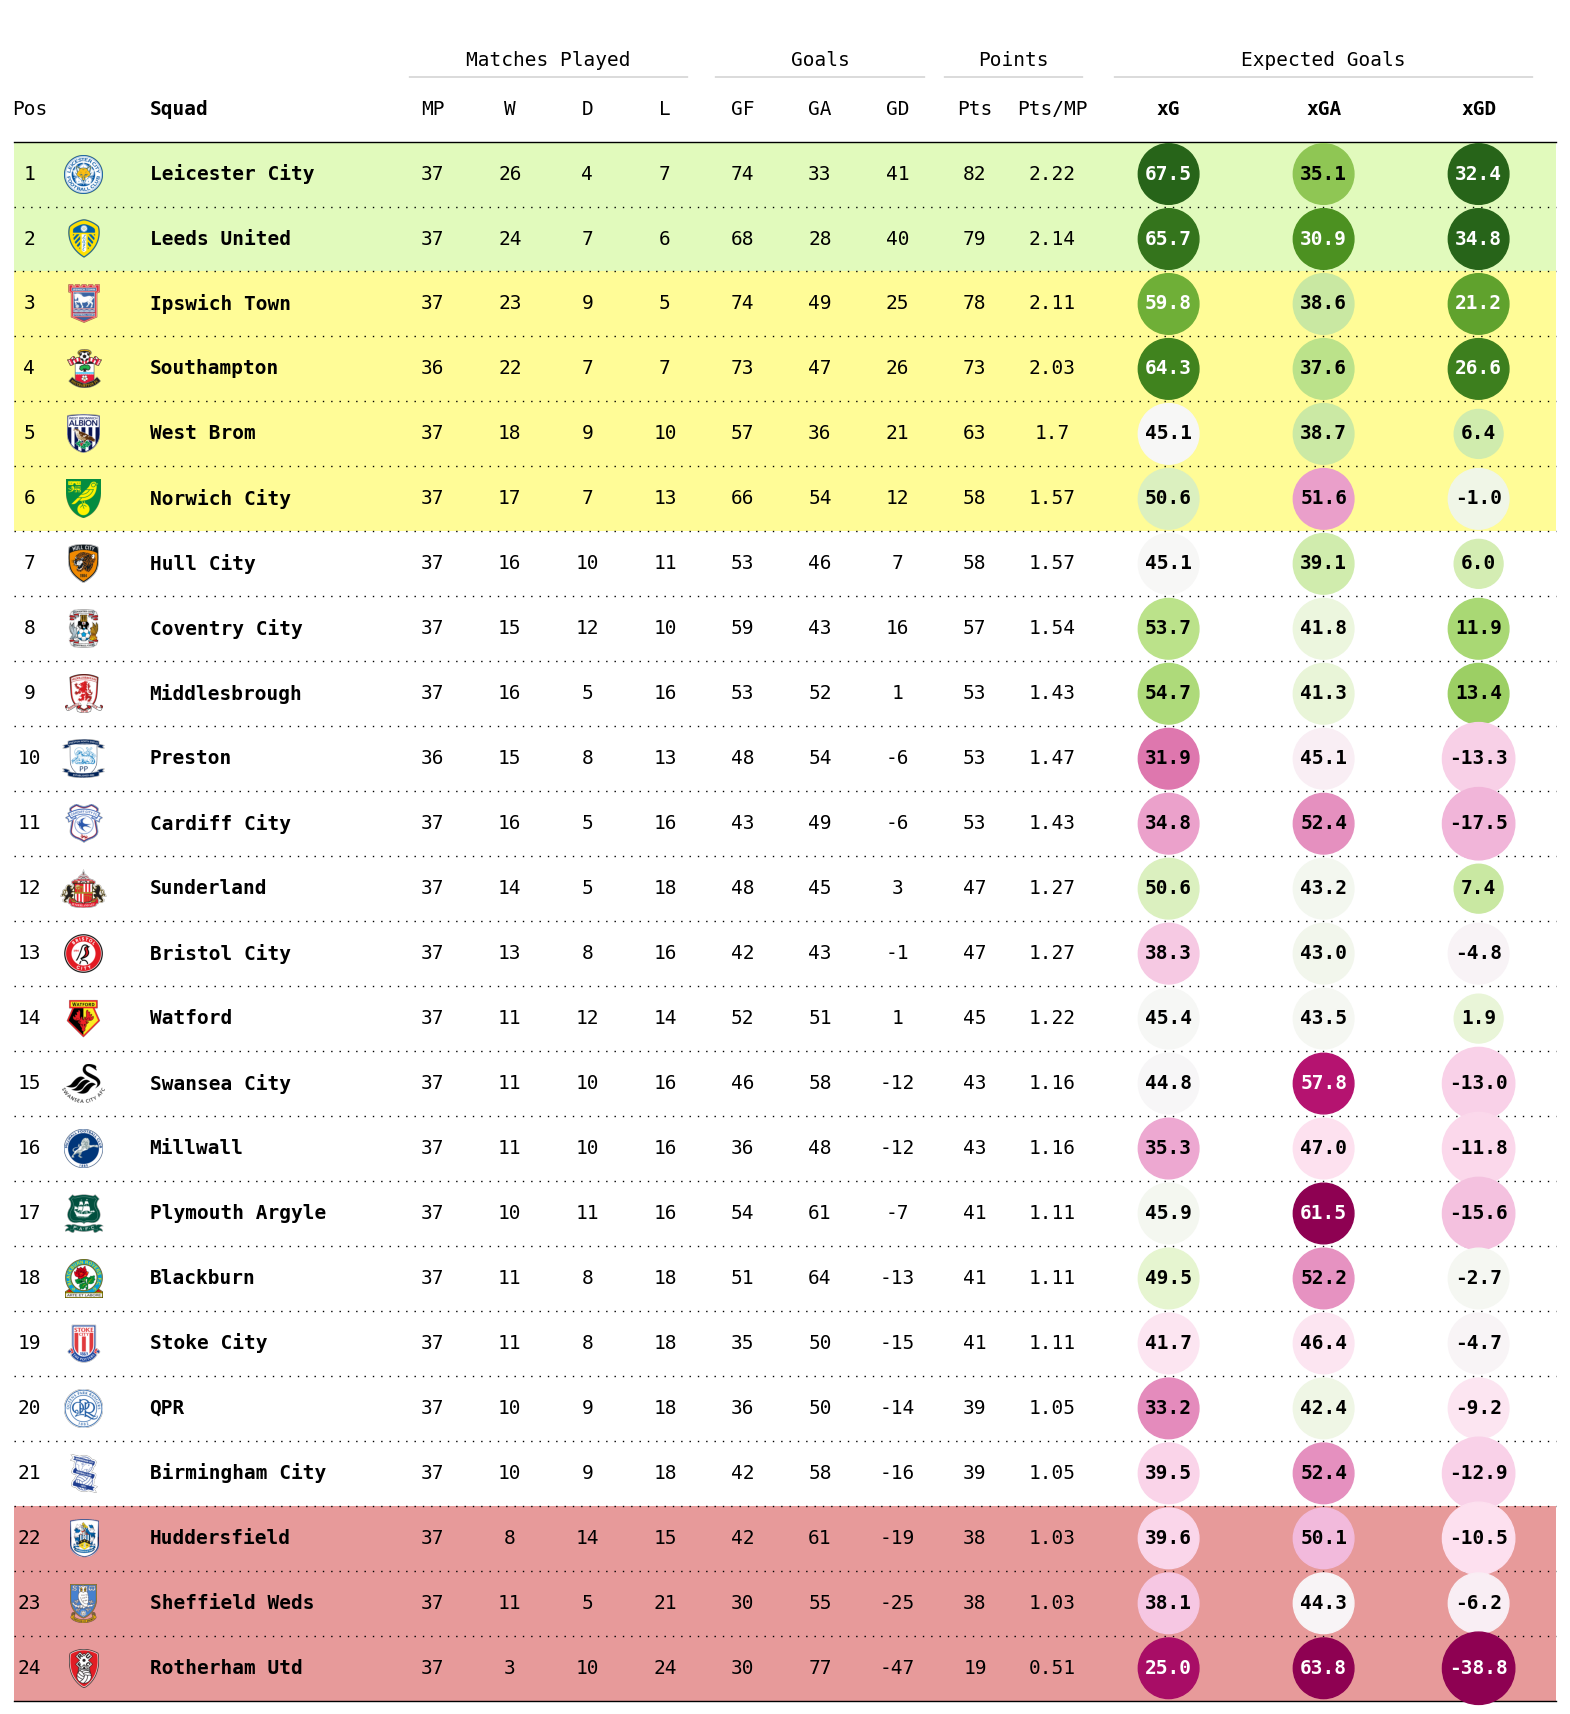

In [70]:
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor(bg_colour)
ax.set_facecolor(bg_colour)

table = Table(
    df,
    column_definitions=col_defs,
    index_col="Pos",
    row_dividers=True,
    row_divider_kw={"linewidth" : 1, "linestyle" : (0, (1,5))},
    footer_divider=True,
    textprops={"fontsize" : 14},
    ax=ax,
).autoset_fontcolors(colnames=["xG", "xGA", "xGD"])

for idx in [0,1]:
    table.rows[idx].set_facecolor(row_colors["top2"])

for idx in range(2,6):
    table.rows[idx].set_facecolor(row_colors["top6"])

for idx in range(21,24):
    table.rows[idx].set_facecolor(row_colors["relegation"])

In [71]:
fig.savefig(
    "C:/Users/George/Documents/Football Analytics/Visuals/Championship_Table.png",
    facecolor=ax.get_facecolor(),
    dpi=200,
    bbox_inches="tight"
)